# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = $\alpha$ + $\beta$ * x
* X : 100 valores distribuídos según una N(1.5,2.5)
* Ye = 1 + 2.7 * x + e
* e estará distribuída según una N(0,0.8)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x = 1.5 + 2.5 + np.random.randn(100)

(array([ 4.,  5., 13., 19., 22., 10., 16.,  7.,  2.,  2.]),
 array([2.0798417 , 2.52135419, 2.96286669, 3.40437919, 3.84589168,
        4.28740418, 4.72891667, 5.17042917, 5.61194166, 6.05345416,
        6.49496665]),
 <BarContainer object of 10 artists>)

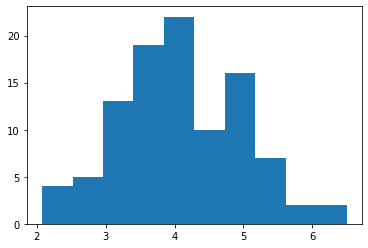

In [68]:
plt.hist(x)

In [69]:
res = 0 + 0.8 * np.random.randn(100)

In [70]:
y_pred = 1 + 2.7 * x

In [71]:
y_act = 1 + 2.7 * x + res

In [72]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [73]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [74]:
data.head()

,x,y_actual,y_prediccion
0,4.594148,12.414866,13.404199
1,3.758063,11.746305,11.146769
2,5.485834,15.992763,15.811751
3,4.005772,11.100849,11.815583
4,4.505415,12.279636,13.164619


In [75]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

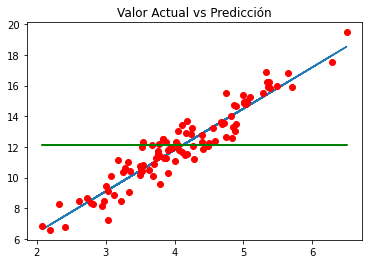

In [76]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?

* SST = SSD + SSR
* SST: Variabilidad de los datos con respecto de su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR: Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [77]:
y_mean = np.mean(y_act)
data["SSR"] = (data["y_prediccion"] - y_mean)**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - y_mean)**2

In [78]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,4.594148,12.414866,13.404199,1.635436,0.978780,0.083815
1,3.758063,11.746305,11.146769,0.957635,0.359443,0.143681
2,5.485834,15.992763,15.811751,13.589496,0.032765,14.956825
3,4.005772,11.100849,11.815583,0.095960,0.510845,1.049616
4,4.505415,12.279636,13.164619,1.080065,0.783195,0.023802


In [79]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [80]:
SSR

569.7118713693422

In [81]:
SSD

63.677264814039276

In [82]:
SST

648.3252701260321

In [83]:
SSR+SSD

633.3891361833815

In [84]:
R2 = SSR/SST
R2

0.8787438923344639

(array([ 5.,  8., 10., 21., 17., 14., 11.,  8.,  4.,  2.]),
 array([-1.75439115, -1.38401553, -1.01363991, -0.64326429, -0.27288866,
         0.09748696,  0.46786258,  0.8382382 ,  1.20861382,  1.57898945,
         1.94936507]),
 <BarContainer object of 10 artists>)

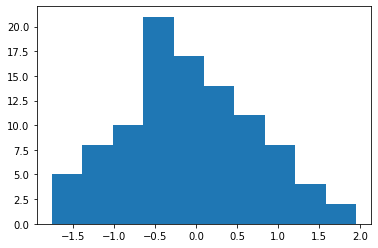

In [85]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [86]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(4.090830824267577, 12.125357243327667)

In [87]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [88]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [89]:
alpha = y_mean - beta * x_mean

In [90]:
alpha, beta

(0.9227067944241796, 2.7384780574271756)

El modelo lineal obtenido por regresión es: y = 1.1820072722231902 + 2.6576606578876625 * x

In [91]:
data["y_model"] = alpha + beta * data["x"]

In [92]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.594148,12.414866,13.404199,1.635436,0.978780,0.083815,0.145715,0.253328,13.503680
1,3.758063,11.746305,11.146769,0.957635,0.359443,0.143681,0.126137,0.110735,11.214079
2,5.485834,15.992763,15.811751,13.589496,0.032765,14.956825,5.395041,1.946033,15.945542
3,4.005772,11.100849,11.815583,0.095960,0.510845,1.049616,0.087144,0.007235,11.892424
4,4.505415,12.279636,13.164619,1.080065,0.783195,0.023802,0.063961,0.171880,13.260686


In [93]:
SSR = sum((data["y_model"] - y_mean)**2) 
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [94]:
SSR, SSD, SST

(585.4054060492922, 62.91986407674038, 648.325270126032)

In [95]:
R2 = SSR / SST
R2

0.9029501594708649

Text(0.5, 1.0, 'Valor Actual vs Predicción')

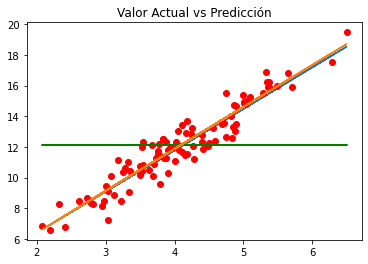

In [96]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"],"ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estandar de los residuos (RSE)

In [97]:
RSE = np.sqrt(SSD / (len(data) - 2))
RSE

0.8012736295139717

In [98]:
np.mean(data["y_actual"])

12.125357243327667

In [99]:
RSE / np.mean(data["y_actual"])

0.06608247604043964